<a href="https://colab.research.google.com/github/MohamamdAghaei/Acea-Smart-Water-Analytics/blob/main/Big_Data_project_Water_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importig and understanding data**

In [14]:
import pandas as pd
from datetime import datetime, date

In [15]:
#Reading dataset
df = pd.read_csv('/content/lakes_fe.csv')

In [16]:
#Checking shape and size of the dataset
df.shape

(6603, 5)

In [17]:
df.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,0,2.857312,14.530141,2.578255,249.606745
1,1,2.857312,14.530141,2.578255,249.606745
2,2,2.857312,14.530141,2.578255,249.606745
3,3,2.857312,14.530141,2.578255,249.606745
4,4,2.857312,14.530141,2.578255,249.606745


In [18]:
#Finfing information and simultaneously finding Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               6603 non-null   int64  
 1   Mean_Rainfall      6603 non-null   float64
 2   Mean_Temp          6603 non-null   float64
 3   Actual_Flow_Rate   6603 non-null   float64
 4   Actual_Lake_Level  6603 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 258.1 KB


# **Preprocessing**

In [21]:
#Checking missing values
df.isnull().sum()

,0
Date,0
Mean_Rainfall,0
Mean_Temp,0
Actual_Flow_Rate,0
Actual_Lake_Level,0


In [19]:
#Cheking duplicate roes
print(df.duplicated().sum())

0


In [20]:
# Convert the 'Date' column to datetime format
# Assuming day 0 is '01/01/2006'
start_date = datetime(2006, 1, 1)
df['Date'] = start_date + pd.to_timedelta(df['Date'], unit='D')

# Display the DataFrame
df.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,2006-01-01,2.857312,14.530141,2.578255,249.606745
1,2006-01-02,2.857312,14.530141,2.578255,249.606745
2,2006-01-03,2.857312,14.530141,2.578255,249.606745
3,2006-01-04,2.857312,14.530141,2.578255,249.606745
4,2006-01-05,2.857312,14.530141,2.578255,249.606745


# **EDA**

In [ ]:
import matplotlib.pyplot as plt

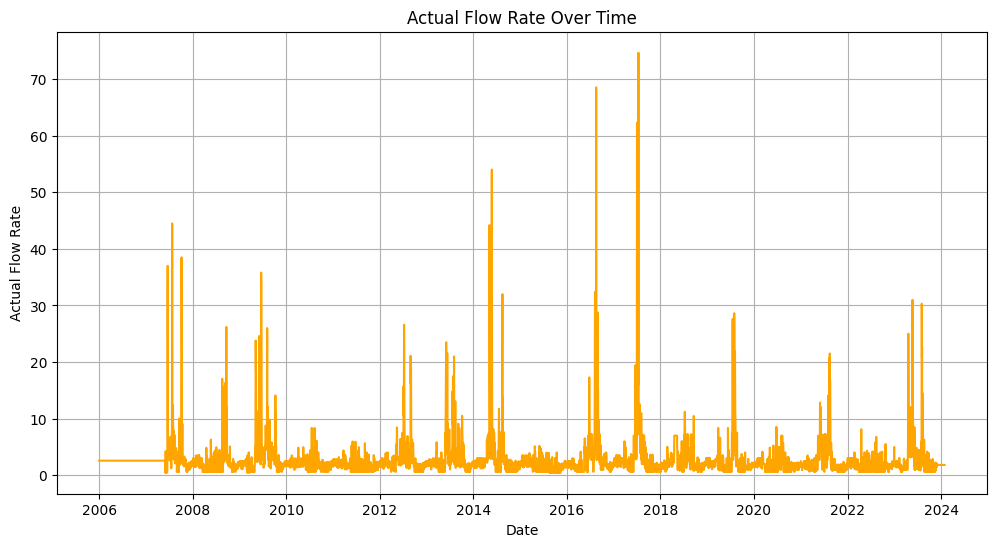

In [24]:
# plotting Date and Actual_Flow_Rate and the color orange

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Actual_Flow_Rate'], color='orange')
plt.xlabel('Date')
plt.ylabel('Actual Flow Rate')
plt.title('Actual Flow Rate Over Time')
plt.grid(True)
plt.show()


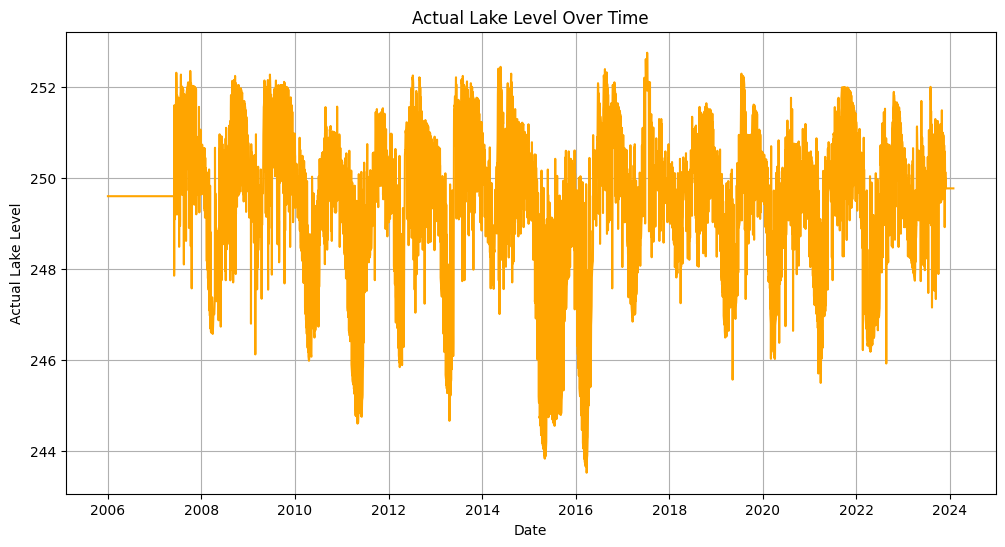

In [25]:
#plottin Date and Actual_Lake_Level and the color orange

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Actual_Lake_Level'], color='orange')
plt.xlabel('Date')
plt.ylabel('Actual Lake Level')
plt.title('Actual Lake Level Over Time')
plt.grid(True)
plt.show()

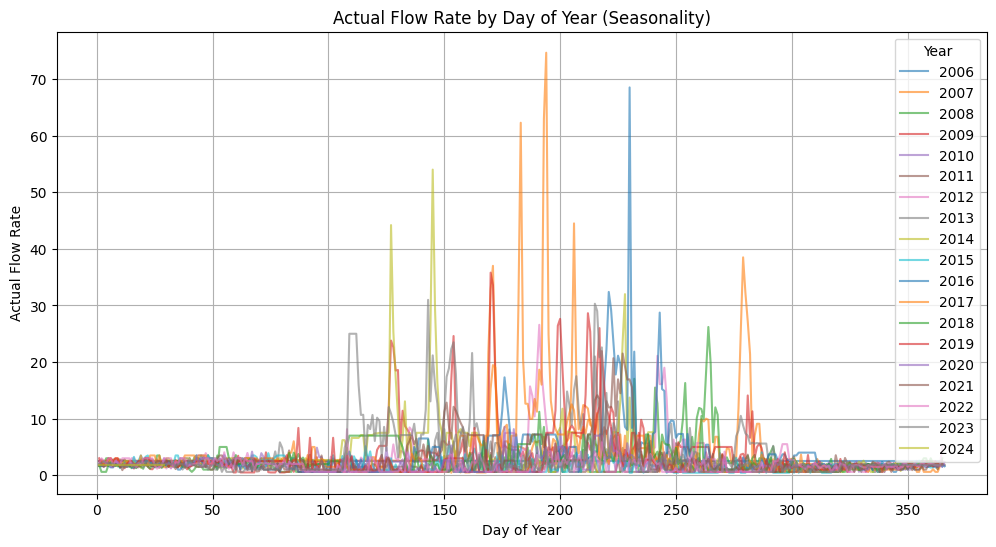

In [43]:
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.dayofyear

plt.figure(figsize=(12, 6))

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    plt.plot(year_data['day_of_year'], year_data['Actual_Flow_Rate'], label=str(year))

plt.xlabel('Day of Year')
plt.ylabel('Actual Flow Rate')
plt.title('Actual Flow Rate Seasonality by Year')
plt.legend()
plt.grid(True)
plt.show()

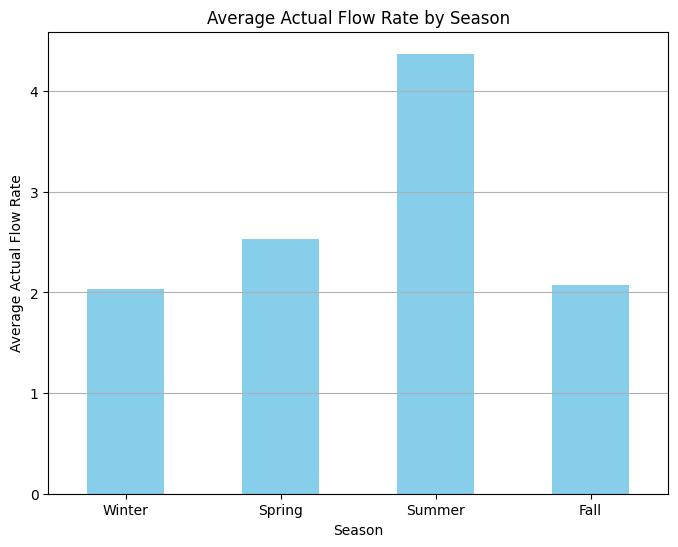

In [40]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Date'].apply(get_season)

# Group by season and calculate the mean Actual_Flow_Rate
seasonal_flow_rate = df.groupby('Season')['Actual_Flow_Rate'].mean()

# Define the order of seasons for the plot
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
seasonal_flow_rate.reindex(season_order).plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Average Actual Flow Rate')
plt.title('Average Actual Flow Rate by Season')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Year with the highest average flow rate: 2007 (3.85)
Year with the lowest average flow rate: 2011 (1.68)


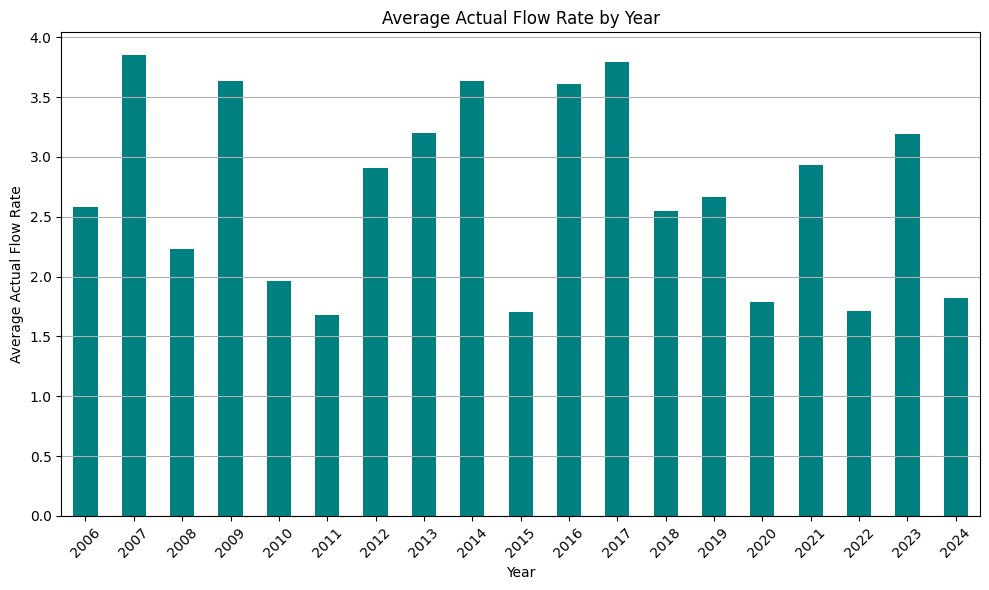

In [45]:
# Group by year and calculate the mean Actual_Flow_Rate
yearly_flow_rate = df.groupby('year')['Actual_Flow_Rate'].mean()

# Find the year with the highest and lowest average flow rate
year_highest_rate = yearly_flow_rate.idxmax()
year_lowest_rate = yearly_flow_rate.idxmin()

print(f"Year with the highest average flow rate: {year_highest_rate} ({yearly_flow_rate.max():.2f})")
print(f"Year with the lowest average flow rate: {year_lowest_rate} ({yearly_flow_rate.min():.2f})")

# Optional: Plotting the yearly average flow rate for better visualization
plt.figure(figsize=(10, 6))
yearly_flow_rate.plot(kind='bar', color='teal')
plt.xlabel('Year')
plt.ylabel('Average Actual Flow Rate')
plt.title('Average Actual Flow Rate by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

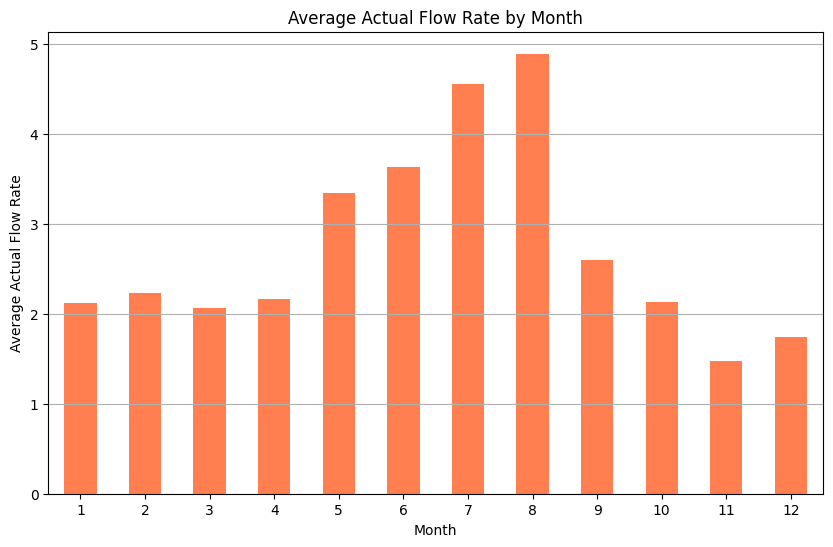

In [48]:
# Extract month
df['month'] = df['Date'].dt.month

# Group by month and calculate the mean Actual_Flow_Rate
monthly_flow_rate = df.groupby('month')['Actual_Flow_Rate'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
monthly_flow_rate.plot(kind='bar', color='coral')
plt.xlabel('Month')
plt.ylabel('Average Actual Flow Rate')
plt.title('Average Actual Flow Rate by Month')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()